<a href="https://colab.research.google.com/github/dwkaris/Exploratory-Data-Analysis-WEEK-2-IP/blob/master/DUNCAN_WACHIRA_KARIUKI_WEEK_2_CORE_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEEK 2 INDEPENDENT PROJECT**

# 1. **DEFINING THE ANALYTIC QUESTION**

## a) SPECIFYING THE DATA ANALYTIC QUESTION

  WHICH INDIVIDUALS ARE MOST LIKELY TO USE A BANK ACCOUNT

##b) DEFINING THE METRICS OF SUCCESS

 
1.   Provide insight into some dmographic that drive individuals financial outcome.
2.   Show disparities between financial access and various demograghic factors.


##c) UNDERSTANDING THE CONTEXT

##d) RECORDING THE EXPERIMETAL DESIGN 

##e) DATA RELEVANCE

#2. READING DATA

### IMPORTING OUR LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [0]:
# Loading our dataset
# Dataset url: http://bit.ly/FinancialDataset (Links to an external site.) 

with open("Financial Dataset - 1.csv",'r')as f:
  finance = pd.read_csv(f, encoding= 'utf')


#3. CHEKING THE DATA

In [95]:
# Cheking the no. records of data in our dataset
finance.shape

(23524, 13)

In [96]:
#Preview the top of our dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [97]:
# Pre view botton of our dataset

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [98]:
# Checking the datatypes oof our dataset
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4.EXTERNAL DATASOURCE VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to our dataset. 

# 5. TIDYING THE DATASET

In [99]:
# Change the column names to smaller names that can fit in our visualizatons
finance.columns = ['country','year','id', 'Bank account', 'Location','Phone', 'householdsize', 'Age','gender', 'househierachy', 'status','Educuation', 'Jobtype']
finance.head()

,country,year,id,Bank account,Location,Phone,householdsize,Age,gender,househierachy,status,Educuation,Jobtype
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [100]:
# Removing white spaces and ensuring uniformity in our dataset

finance.columns = finance.columns.str.strip().str.upper()
finance['COUNTRY'] = finance['COUNTRY'].str.replace(' ',' ').str.lower()
finance['ID'] = finance['ID'].str.replace(' ',' ').str.lower()
finance['BANK ACCOUNT'] = finance['BANK ACCOUNT'].str.replace(' ',' ').str.lower()
finance['LOCATION']= finance['LOCATION'].str.replace(' ',' ').str.lower()
finance['PHONE'] = finance['PHONE'].str.replace(' ',' ').str.lower()
finance['GENDER']= finance['GENDER'].str.replace(' ',' ').str.lower()
finance['HOUSEHIERACHY'] = finance['HOUSEHIERACHY'].str.replace(' ',' ').str.lower() 
finance['STATUS'] = finance['STATUS'].str.replace(' ',' ').str.lower() 
finance['EDUCUATION'] = finance['EDUCUATION'].str.replace(' ',' ').str.lower() 
finance['JOBTYPE'] = finance['JOBTYPE'].str.replace(' ',' ').str.lower() 
finance.head(2)

,COUNTRY,YEAR,ID,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,uniqueid_1,yes,rural,yes,3.0,24.0,female,spouse,married/living together,secondary education,self employed
1,kenya,2018,uniqueid_2,no,rural,no,5.0,70.0,female,head of household,widowed,no formal education,government dependent


In [0]:
# Describing our categorical variables

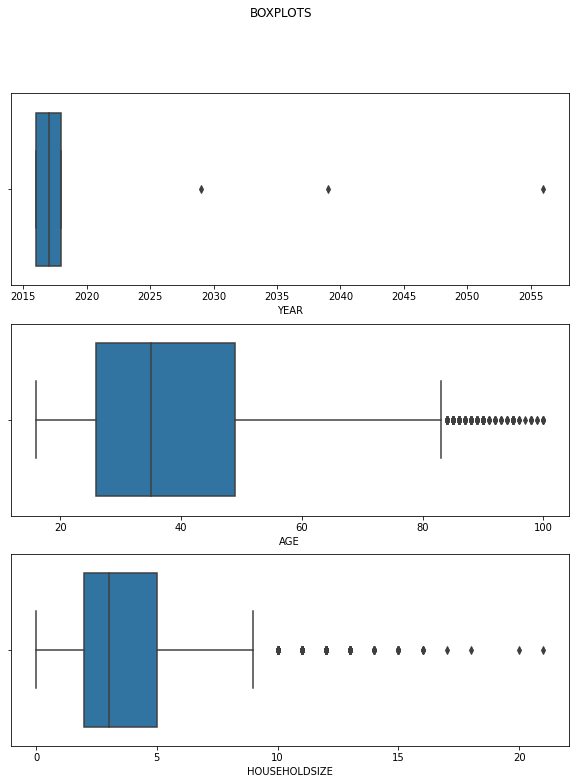

In [102]:
# Cheking for outliers

fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,12))

fig.suptitle('BOXPLOTS')

sns.boxplot(finance['YEAR'], ax= ax1, orient = 'h')
sns.boxplot(finance['AGE'],ax = ax2, orient = 'h')
sns.boxplot(finance['HOUSEHOLDSIZE'], ax = ax3, orient = 'h')
plt.show()

In [103]:
#check anomalies for numerical data
finance.describe() 

,YEAR,HOUSEHOLDSIZE,AGE
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [104]:
# Identifying the Missing Data
#
finance.isnull().sum()

COUNTRY          14
YEAR              0
ID                0
BANK ACCOUNT     36
LOCATION         15
PHONE            11
HOUSEHOLDSIZE    28
AGE              34
GENDER           34
HOUSEHIERACHY     4
STATUS           32
EDUCUATION       29
JOBTYPE          30
dtype: int64

In [105]:
# Dealing with the Missing Data
#

finance.dropna(axis=0, how = 'any', inplace = True)
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COUNTRY        23343 non-null  object 
 1   YEAR           23343 non-null  int64  
 2   ID             23343 non-null  object 
 3   BANK ACCOUNT   23343 non-null  object 
 4   LOCATION       23343 non-null  object 
 5   PHONE          23343 non-null  object 
 6   HOUSEHOLDSIZE  23343 non-null  float64
 7   AGE            23343 non-null  float64
 8   GENDER         23343 non-null  object 
 9   HOUSEHIERACHY  23343 non-null  object 
 10  STATUS         23343 non-null  object 
 11  EDUCUATION     23343 non-null  object 
 12  JOBTYPE        23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [106]:
# REMOVING OUTLIERS
finance = finance[finance['YEAR'] <= 2018]
finance['YEAR'].unique()

array([2018, 2016, 2017])

# 5.EXPLANATORY ANAYSIS

##UNIVARIATE ANALYSIS

In [107]:
# Measure of Central Tendancy for categorical data

f_mode =finance[['COUNTRY', 'YEAR', 'BANK ACCOUNT', 'LOCATION', 'PHONE', 'GENDER', 'HOUSEHIERACHY', 'STATUS','EDUCUATION', 'JOBTYPE']].mode()
f_mode.T

,0
COUNTRY,rwanda
YEAR,2016
BANK ACCOUNT,no
LOCATION,rural
PHONE,yes
GENDER,female
HOUSEHIERACHY,head of household
STATUS,married/living together
EDUCUATION,primary education
JOBTYPE,self employed


In [108]:
# Measure of Central Tendancy for numerical
finance.describe()
# 25% is the first quatile
# 50% is the median
# 75% is the third quatile
# std is the standard deviation

,YEAR,HOUSEHOLDSIZE,AGE
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [109]:
# INTERQUATILE RANGE AGE
q1_AGE,q3_AGE = np.percentile(finance['AGE'],[25,75])
iqr_AGE = q3_AGE - q1_AGE
print('THE AGE INTERQUATILE RANGE IS',iqr_AGE)
# confidence interval
l_bound_AGE = q1_AGE - (1.5*iqr_AGE)
u_bound_AGE = q3_AGE + (1.5*iqr_AGE)
print('Confidence interval is =',u_bound_AGE,'--',l_bound_AGE )
print('\n')

# INTERQUATILE RANGE HOUSEHOLDSIZE
q1_HOUSEHOLDSIZE,q3_HOUSEHOLDSIZE = np.percentile(finance['HOUSEHOLDSIZE'],[25,75])
iqr_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE - q1_HOUSEHOLDSIZE
print('THE HOUSEHOLDSIZE INTERQUATILE RANGE IS',iqr_HOUSEHOLDSIZE)
# confidence interval
l_bound_HOUSEHOLDSIZE = q1_HOUSEHOLDSIZE - (1.5*iqr_HOUSEHOLDSIZE)
u_bound_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE + (1.5*iqr_HOUSEHOLDSIZE)
print('Confidence interval is =',u_bound_HOUSEHOLDSIZE,'--',l_bound_HOUSEHOLDSIZE)

THE AGE INTERQUATILE RANGE IS 23.0
Confidence interval is = 83.5 -- -8.5


THE HOUSEHOLDSIZE INTERQUATILE RANGE IS 3.0
Confidence interval is = 9.5 -- -2.5


In [110]:
# range
print("HOUSEHOLDSIZE RANGE IS =",finance['HOUSEHOLDSIZE'].max()-finance['HOUSEHOLDSIZE'].min())
print("HOUSEHOLDSIZE RANGE IS =",finance['HOUSEHOLDSIZE'].max()-finance['HOUSEHOLDSIZE'].min())

HOUSEHOLDSIZE RANGE IS = 21.0
HOUSEHOLDSIZE RANGE IS = 21.0


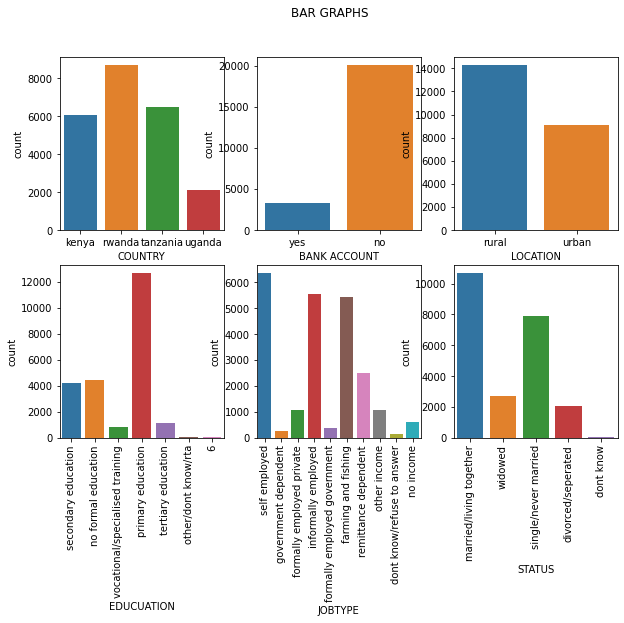

In [111]:
# 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

plt.xticks(rotation=90)
sns.countplot(finance.COUNTRY, ax=ax1)
sns.countplot(finance['BANK ACCOUNT'], ax=ax2)
sns.countplot(finance['LOCATION'], ax=ax3)

EDUCUATION = sns.countplot(finance['EDUCUATION'], ax=ax4)
EDUCUATION.set_xticklabels(EDUCUATION.get_xticklabels(),rotation = 90)

JOBTYPE=sns.countplot(finance['JOBTYPE'], ax=ax5)
JOBTYPE.set_xticklabels(JOBTYPE.get_xticklabels(),rotation = 90)

STATUS=sns.countplot(finance['STATUS'], ax=ax6)

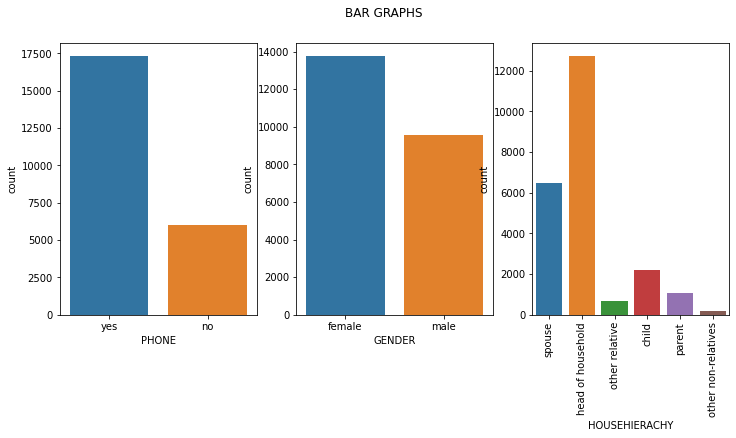

In [112]:
# VISUALIZE CATEGORICAL DATA

fig, (ax4,ax5,ax6) = plt.subplots(1,3,figsize = (12,5))
plt.suptitle('BAR GRAPHS')
plt.xticks(rotation=90)
sns.countplot(finance['PHONE'], ax=ax4)
sns.countplot(finance['GENDER'], ax=ax5)
sns.countplot(finance['HOUSEHIERACHY'], ax=ax6)

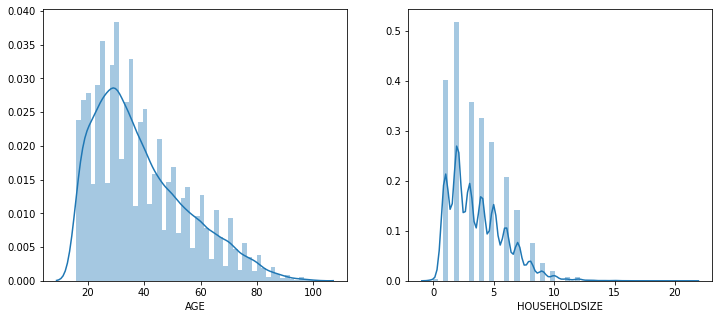

In [113]:
# Visualizing Univariate Data
# Histogram
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,5))
sns.distplot(finance['AGE'],ax = ax1)
sns.distplot(finance['HOUSEHOLDSIZE'],ax = ax2)

In [114]:
#SKEWNESS
print("HOUSEHOLD SIZE SKEWNWSS = ",finance['HOUSEHOLDSIZE'].skew())
print("HOUSEHOLD SIZE KURTOSIS = ",finance['HOUSEHOLDSIZE'].kurt())
print('\n')
print("AGE SKEWNWSS = ",finance['AGE'].skew())
print("AGE KURTOSIS = ",finance['AGE'].kurt())

HOUSEHOLD SIZE SKEWNWSS =  0.9741827150450616
HOUSEHOLD SIZE KURTOSIS =  1.1538357462528523


AGE SKEWNWSS =  0.8406145812311228
AGE KURTOSIS =  0.09826807013177241


In [115]:
# Frequency tables for categorical variables
print('COUNTRY')
print(finance.COUNTRY.value_counts())
print("\n")
print('YEAR')
print(finance['YEAR'].value_counts())
print("\n")
print('BANK ACCOUNT ACCESS')
print(finance['BANK ACCOUNT'].value_counts())
print("\n")
print('RESPONDENTS LOCATION')
print(finance['LOCATION'].value_counts())
print("\n")
print('CELLPHONE ACCESS')
print(finance['PHONE'].value_counts())
print("\n")
print('RESPONDENTS GENDER')
print(finance['GENDER'].value_counts())
print("\n")
print('RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD')
print(finance['HOUSEHIERACHY'].value_counts())
print("\n")
print('MARITAL STATUS')
print(finance['STATUS'].value_counts())
print("\n")
print('EDUCATION LEVEL')
print(finance['EDUCUATION'].value_counts())
print("\n")
print('JOBTYPE')
print(finance['JOBTYPE'].value_counts())

COUNTRY
rwanda      8683
tanzania    6500
kenya       6062
uganda      2095
Name: COUNTRY, dtype: int64


YEAR
2016    8683
2018    8157
2017    6500
Name: YEAR, dtype: int64


BANK ACCOUNT ACCESS
no     20044
yes     3296
Name: BANK ACCOUNT, dtype: int64


RESPONDENTS LOCATION
rural    14263
urban     9077
Name: LOCATION, dtype: int64


CELLPHONE ACCESS
yes    17331
no      6009
Name: PHONE, dtype: int64


RESPONDENTS GENDER
female    13766
male       9574
Name: GENDER, dtype: int64


RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD
head of household      12729
spouse                  6470
child                   2221
parent                  1069
other relative           662
other non-relatives      189
Name: HOUSEHIERACHY, dtype: int64


MARITAL STATUS
married/living together    10698
single/never married        7902
widowed                     2683
divorced/seperated          2049
dont know                      8
Name: STATUS, dtype: int64


EDUCATION LEVEL
primary education         

##BIVARIATE ANAYSIS

In [116]:
#Convert Categorical Data To Numerical
df = finance

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['ID'] = Encoder.fit_transform(df['ID'])
df['BANK ACCOUNT']= Encoder.fit_transform(df['BANK ACCOUNT'])
df['PHONE']= Encoder.fit_transform(df['PHONE'])
df['HOUSEHOLDSIZE']= Encoder.fit_transform(df['HOUSEHOLDSIZE'])
df['AGE']= Encoder.fit_transform(df['AGE'])
df['GENDER']= Encoder.fit_transform(df['GENDER'])
df['HOUSEHIERACHY']= Encoder.fit_transform(df['HOUSEHIERACHY'])
df['STATUS']= Encoder.fit_transform(df['STATUS'])
df['EDUCUATION']= Encoder.fit_transform(df['EDUCUATION'])
df['LOCATION']= Encoder.fit_transform(df['LOCATION'])
df['JOBTYPE']= Encoder.fit_transform(df['JOBTYPE'])

df.head()

,COUNTRY,YEAR,ID,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,0,1,0,1,3,8,0,5,2,4,9
1,kenya,2018,1111,0,0,0,5,54,0,1,4,1,4
2,kenya,2018,2222,1,1,1,5,10,1,3,3,6,9
3,kenya,2018,3333,0,0,1,5,18,0,1,2,3,3
4,kenya,2018,4444,0,1,0,8,10,1,0,3,3,5


In [117]:
df.nunique()

COUNTRY             4
YEAR                3
ID               8687
BANK ACCOUNT        2
LOCATION            2
PHONE               2
HOUSEHOLDSIZE      21
AGE                85
GENDER              2
HOUSEHIERACHY       6
STATUS              5
EDUCUATION          7
JOBTYPE            10
dtype: int64

In [118]:
# Describing our data

!pip install researchpy
import researchpy as rp
print('AGE ANALYSIS PER COUNRY')
print(round(rp.summary_cont(finance.groupby(['COUNTRY'])['AGE'])))
print('\n')
print('HOUSEHOLDSIZE ANALYSIS PER COUNRY')
print(round(rp.summary_cont(finance.groupby(['COUNTRY'])['HOUSEHOLDSIZE'])))

AGE ANALYSIS PER COUNRY


             N  Mean    SD   SE  95% Conf.  Interval
COUNTRY                                             
kenya     6062  24.0  17.0  0.0       23.0      24.0
rwanda    8683  23.0  16.0  0.0       23.0      24.0
tanzania  6500  22.0  16.0  0.0       22.0      23.0
uganda    2095  19.0  15.0  0.0       19.0      20.0


HOUSEHOLDSIZE ANALYSIS PER COUNRY


             N  Mean   SD   SE  95% Conf.  Interval
COUNTRY                                            
kenya     6062   4.0  2.0  0.0        4.0       4.0
rwanda    8683   4.0  2.0  0.0        4.0       5.0
tanzania  6500   2.0  1.0  0.0        2.0       2.0
uganda    2095   5.0  3.0  0.0        5.0       5.0


Text(0.5, 1.0, 'HOUSEHOLD SIZE AND AGE SCATTER PLOT')

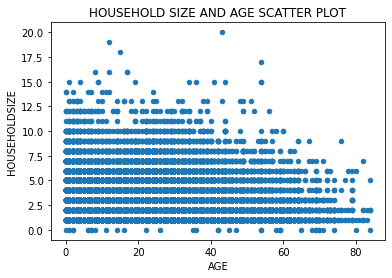

In [119]:
 # VISUALIVING RELATIONSHIP BETWEEN GENDER AND ACCESS TO BANK ACCOUNT
df.plot(x= 'AGE', y= 'HOUSEHOLDSIZE', kind = "scatter")
plt.title("HOUSEHOLD SIZE AND AGE SCATTER PLOT")

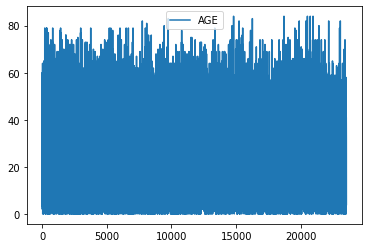

In [123]:
finance[['AGE','COUNTRY']].plot()